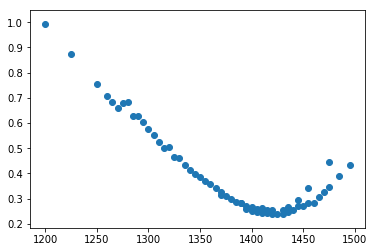

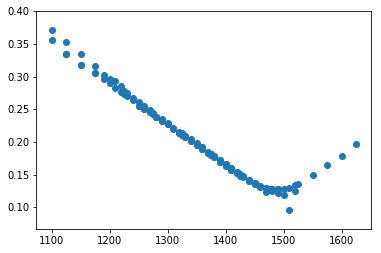

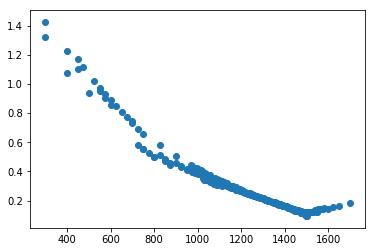

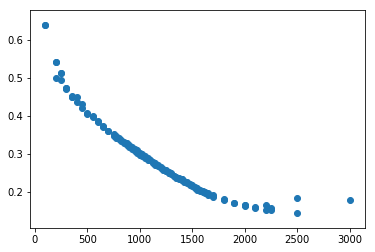

<Figure size 432x288 with 0 Axes>

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import scipy.stats as si


S = 1404.94
rf = 0.0265

path = os.getcwd()
data = pd.read_csv(path + '/data.csv')
callput = data['type'].values
T = (data['days']/365).values
K = data['strike'].values
V = data['IV'].values
d = data[data['days'] == 2]
plt.scatter(d['strike'].values, d['IV'].values)
plt.show()
plt.clf()
d = data[data['days'] == 30]
plt.scatter(d['strike'].values, d['IV'].values)
plt.show()
plt.clf()
d = data[data['days'] == 45]
plt.scatter(d['strike'].values, d['IV'].values)
plt.show()
plt.clf()
d = data[data['days'] ==837]
plt.scatter(d['strike'].values, d['IV'].values)
plt.show()
plt.clf()


fig = plt.figure()
ax = fig.gca(projection='3d')

ax.

In [ ]:
T = (data['days']/365).values
K = data['strike'].values
V = data['IV'].values
d = data[data['days'] == 2]
plt.scatter(d['strike'].values, d['IV'].values)
plt.show()
plt.clf()
d = data[data['days'] == 30]
plt.scatter(d['strike'].values, d['IV'].values)
plt.show()
plt.clf()
d = data[data['days'] == 45]
plt.scatter(d['strike'].values, d['IV'].values)
plt.show()
plt.clf()
d = data[data['days'] ==837]
plt.scatter(d['strike'].values, d['IV'].values)
plt.show()
plt.clf()



In [93]:
def option_price(S, K, T, sigma, option = 'C', r = 0.05):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    if option == 'C':
        result = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    if option == 'P':
        result = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))
        
    return result

In [118]:
option_price(S, K[1], T[1], V[1], callput[1], 0)

14.905329151512746

In [120]:
prices = []
for i in range(len(K)):
    prices.append(option_price(S, K[i], T[i], V[i], callput[i], 0.02))
prices

c:\users\user-pc\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\user-pc\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\user-pc\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


[226.3355814415786,
 21.57643797657795,
 0.25949115999845274,
 56.233730850864646,
 110.2746564436207,
 117.17514633481818,
 161.0998572572779,
 0.9768320099075702,
 1.6392386834318238,
 2.047725027505387,
 2.8749736404004356,
 283.8720348302676,
 224.24590439513145,
 0.3374014915432315,
 55.687651321971174,
 94.18387106302515,
 122.76775149493244,
 0.9159703391815834,
 1.6342413920517114,
 2.7978140592901717,
 2.903612439010768,
 41.08262893694638,
 196.50457002881876,
 34.70065849202399,
 141.29471738542566,
 191.7073073181324,
 0.8829391993833369,
 54.681129306258356,
 75.85715263224608,
 119.23694286330078,
 94.5307852931943,
 72.72636570515465,
 33.32114498464932,
 0.08110394116819036,
 27.774578558926493,
 161.50218615002143,
 132.17087623608643,
 105.41066350903998,
 82.51206983132352,
 63.01721646465222,
 53.61508281589829,
 732.9734180110885,
 45.3889379897295,
 85.62993655962532,
 94.67051000474828,
 102.34998433166328,
 119.5595646385658,
 1.5408372114089879,
 nan,
 5.842932

In [96]:
option_price(S, K.all(), T.all(), V.all(), callput.all(), rf)

1403.9661519561653

In [115]:
minrf = 0
curmin = 9999999
for r in np.linspace(0, 0.001, 100):
    prices = []
    for i in range(len(K)):
        prices.append(option_price(S, K[i], T[i], V[i], callput[i], r))
    ssd = np.sum((np.array(prices) - P)**2)
    if ssd < curmin:
        minrf = r
        curmin = ssd
print(minrf)


0.0
